In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
# Load data 
train_data = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test_data = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [4]:
# Investigate data set further in the next cells
print(len(train_data))
train_data.isna().sum(axis=0)

7613


id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
print(len(test_data))
test_data.isna().sum(axis=0)

3263


id             0
keyword       26
location    1105
text           0
dtype: int64

In [6]:
train_data.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

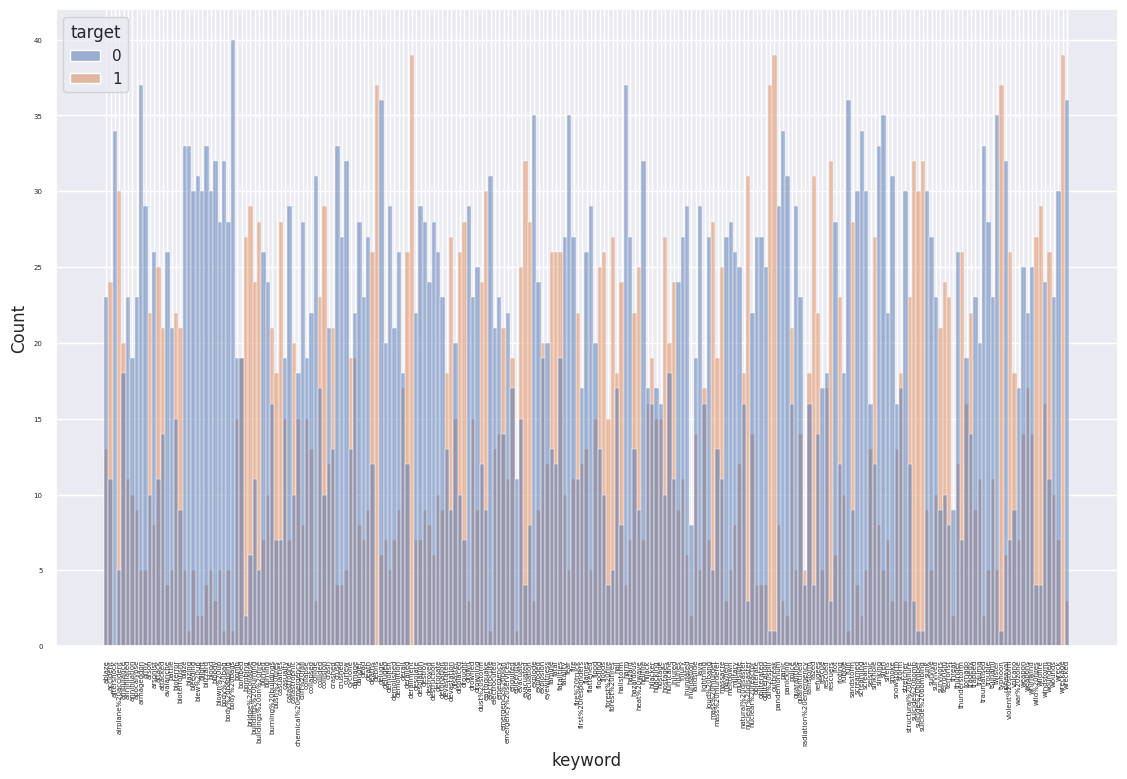

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(13.7,8.27)})
b = sns.histplot(data=train_data, x='keyword', hue='target')
b.tick_params(labelsize=5)
plt.xticks(rotation=90)
plt.show()

In [8]:
train_data['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [9]:
# Clean up data

train_data_clean = train_data
test_data_clean = test_data

# Replace nans with empty spaces
train_data_clean = train_data_clean.fillna('')
test_data_clean = test_data_clean.fillna('')

# Merge location to text
train_data_clean["text extended"] = train_data_clean["location"].astype(str) + ' ' + train_data_clean["text"]
test_data_clean["text extended"] = test_data_clean["location"].astype(str) + ' ' + test_data_clean["text"]

train_data_clean.head()

,id,keyword,location,text,target,text extended
0,1,,,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake ...
1,4,,,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada
2,5,,,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are...
3,6,,,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation o..."
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as...


In [10]:
# Replace %20 in keyword by space and merge with text extended

train_data_clean['keyword'] = train_data_clean['keyword'].str.replace('%20', ' ', regex=True)
test_data_clean['keyword'] = test_data_clean['keyword'].str.replace('%20', ' ', regex=True)

# Merge keyword to text
train_data_clean["text extended"] = train_data_clean["keyword"].astype(str) + ' ' + train_data_clean["text"]
test_data_clean["text extended"] = test_data_clean["keyword"].astype(str) + ' ' + test_data_clean["text"]

train_data_clean.head()

,id,keyword,location,text,target,text extended
0,1,,,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake ...
1,4,,,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada
2,5,,,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are...
3,6,,,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation o..."
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as...


In [11]:
# Drop old columns not needed anymore

train_data_clean = train_data_clean.drop(axis=1, labels=['location', 'keyword', 'text'])
test_data_clean = test_data_clean.drop(axis=1, labels=['location', 'keyword', 'text'])

train_data_clean.head(50)

,id,target,text extended
0,1,1,Our Deeds are the Reason of this #earthquake ...
1,4,1,Forest fire near La Ronge Sask. Canada
2,5,1,All residents asked to 'shelter in place' are...
3,6,1,"13,000 people receive #wildfires evacuation o..."
4,7,1,Just got sent this photo from Ruby #Alaska as...
5,8,1,#RockyFire Update => California Hwy. 20 close...
6,10,1,#flood #disaster Heavy rain causes flash floo...
7,13,1,I'm on top of the hill and I can see a fire i...
8,14,1,There's an emergency evacuation happening now...
9,15,1,I'm afraid that the tornado is coming to our ...


In [12]:
# Clean up text

# Only keep words
train_data_clean['text extended'] = train_data_clean['text extended'].str.replace('[^A-Za-z]+', ' ', regex=True)
test_data_clean['text extended'] = test_data_clean['text extended'].str.replace('[^A-Za-z]+', ' ', regex=True)

# Put everything in lower case
train_data_clean['text extended'] = train_data_clean['text extended'].str.lower()
test_data_clean['text extended'] = test_data_clean['text extended'].str.lower()

train_data_clean.head(50)

,id,target,text extended
0,1,1,our deeds are the reason of this earthquake m...
1,4,1,forest fire near la ronge sask canada
2,5,1,all residents asked to shelter in place are b...
3,6,1,people receive wildfires evacuation orders in...
4,7,1,just got sent this photo from ruby alaska as ...
5,8,1,rockyfire update california hwy closed in bot...
6,10,1,flood disaster heavy rain causes flash floodi...
7,13,1,i m on top of the hill and i can see a fire i...
8,14,1,there s an emergency evacuation happening now...
9,15,1,i m afraid that the tornado is coming to our ...


In [13]:
# Train and validation split

from sklearn.model_selection import train_test_split

X_train_data, X_val_data, y_train_data, y_val_data = train_test_split(train_data_clean['text extended'], 
                                                                     train_data_clean['target'], test_size=0.2, 
                                                                      random_state=42)

X_test_data = test_data_clean['text extended']

In [14]:
# TF-FID vectorizer
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

train_data_clean.head()
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

TFIDF_vectorizer = TfidfVectorizer(lowercase=True, analyzer='word', stop_words='english', max_features=2000)

X_tfidf_train = TFIDF_vectorizer.fit_transform(X_train_data)
X_tfidf_test  = TFIDF_vectorizer.transform(X_test_data)
X_tfidf_val   = TFIDF_vectorizer.transform(X_val_data)

[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/corpora/wordnet/README  
  inflating: /kaggle/working/corpora/wordnet/index.sense  
  inflating: /kaggle/working/corpora/wordnet/data.

In [15]:
# Model - Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

model = MultinomialNB()
model.fit(X_tfidf_train, y_train_data)
score_train = model.score(X_tfidf_train, y_train_data)
print('Training score: ', score_train)

Training score:  0.8344827586206897


In [16]:
# Test model on validation set
y_pred = model.predict(X_tfidf_val)
print(classification_report(y_pred, y_val_data))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       933
           1       0.70      0.77      0.73       590

    accuracy                           0.78      1523
   macro avg       0.77      0.78      0.78      1523
weighted avg       0.79      0.78      0.79      1523



In [17]:
# Submit test data results

y_pred_test = model.predict(X_tfidf_test)

output = pd.DataFrame({'Id': test_data.id, 'SalePrice': np.expm1(y_pred_test)})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
